In [ ]:
#This Column for PIP Install:

In [26]:
#Import Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import glob
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from skimage import io, transform
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB1,EfficientNetB7

# 1.  **Load the Data**

In [4]:
#Read the Aptos 2019 Dataset
aptosO_2019 = pd.read_csv('/kaggle/input/aptos2019-blindness-detection/train.csv')
aptosO_2019.shape
aptosO_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [5]:
#Read the Aptos 2015 Dataset(resize)
aptos_2015 = pd.read_csv('/kaggle/input/resized-2015-2019-blindness-detection-images/labels/trainLabels15.csv')
aptos_2015.shape
aptos_2015.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   35126 non-null  object
 1   level   35126 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 549.0+ KB


In [6]:
#Rename the 2015 data
aptos_2015.rename(columns={'image':'id_code','level':'diagnosis'},inplace=True)

In [27]:
#Read the Aptos 2019 Dataset(resize)
aptos_2019 = pd.read_csv('/kaggle/input/resized-2015-2019-blindness-detection-images/labels/trainLabels19.csv')
aptos_2019.shape
aptos_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [8]:
aptos_2019.value_counts().sum()

3662

In [9]:
aptos_2015.value_counts().sum()

35126

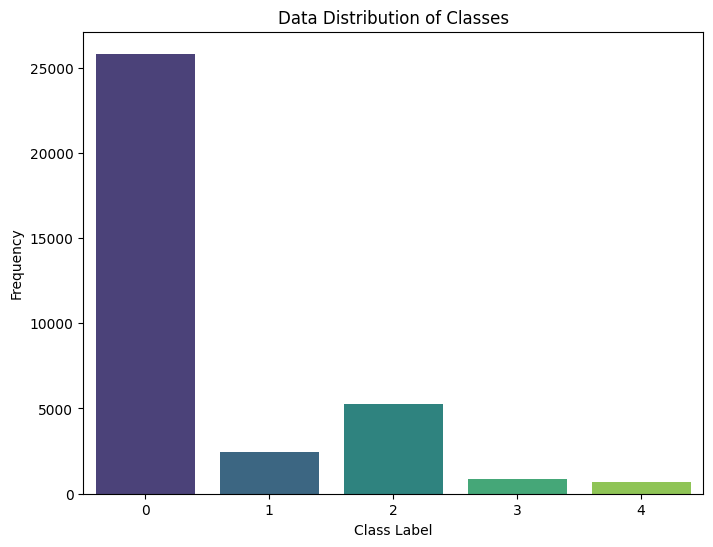

In [10]:
#Distribution Plot for 2015 resize
plt.figure(figsize=(8, 6))
sns.countplot(x="diagnosis", data=aptos_2015, palette="viridis")
plt.title("Data Distribution of Classes")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

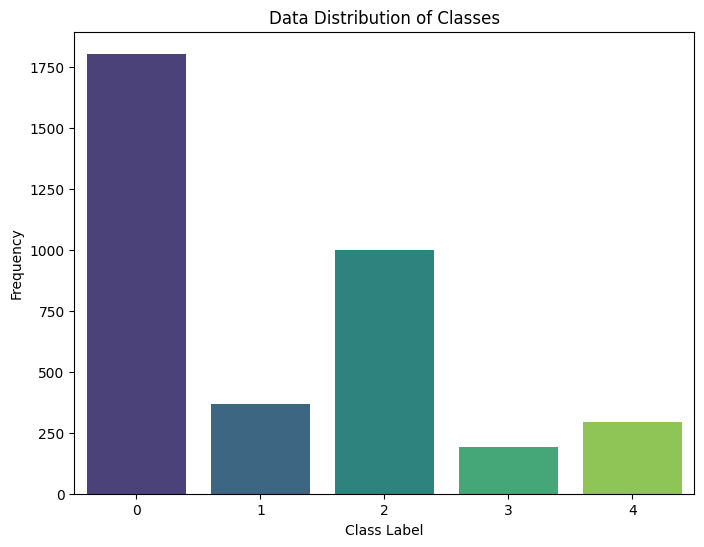

In [11]:
#Distribution Plot for 2019 resize
plt.figure(figsize=(8, 6))
sns.countplot(x="diagnosis", data=aptos_2019, palette="viridis")
plt.title("Data Distribution of Classes")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

# 2. Merge The data  

In [12]:
# Concatenate row-wise (default for axis=0)
merge_data = pd.concat([aptos_2015, aptos_2019], ignore_index=True)
merge_data.to_csv("merge the data 2015 and 2019 Aptos.csv",index=False)


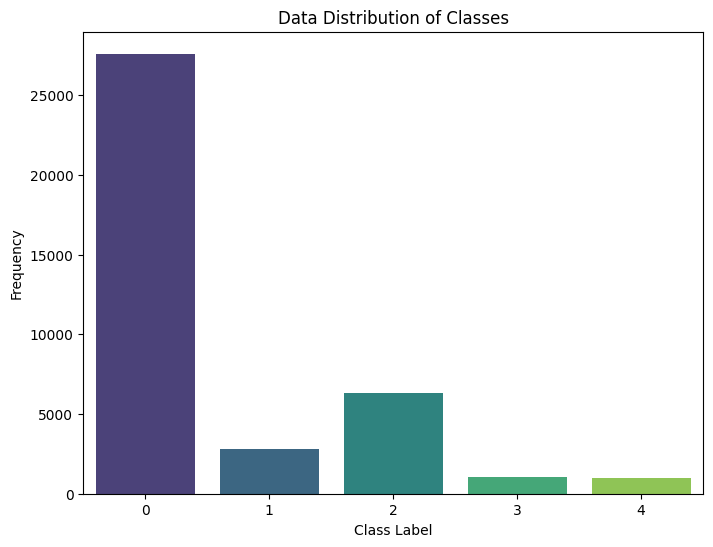

In [13]:
#Distribution Plot for 2019 resize
plt.figure(figsize=(8, 6))
sns.countplot(x="diagnosis", data=merge_data, palette="viridis")
plt.title("Data Distribution of Classes")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

1. Slightly increased the data
2. there is No duplicated and null values
3. And i used aptos 2019 original data in that much balanced data

# 3.  *PreProcessing*

In [ ]:
WORKERS = 2
CHANNEL = 3
import warnings
warnings.filterwarnings("ignore")
IMG_SIZE = 512
NUM_CLASSES = 5
SEED = 77
TRAIN_NUM = 10

In [19]:
import cv2

def preprocess_image(image):
    """
    Apply preprocessing to an image using Gaussian blur.
    
    Parameters:
        image (numpy array): The original image array (BGR format as loaded by OpenCV).
        
    Returns:
        numpy array: The preprocessed image array.
    """
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Apply Gaussian blur preprocessing
    preprocessed_image = cv2.addWeighted(image_rgb, 4, cv2.GaussianBlur(image_rgb, (0, 0), 10), -4, 128)
    
    return preprocessed_image


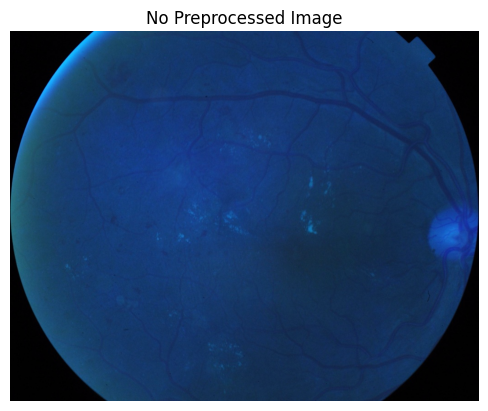

In [24]:
# Load an image (replace 'path/to/image.jpg' with the actual path)
image = cv2.imread('/kaggle/input/resized-2015-2019-blindness-detection-images/resized train 19/000c1434d8d7.jpg')

# Apply preprocessing
processed_image = preprocess_image(image)

# Display the processed image
import matplotlib.pyplot as plt
plt.imshow(processed_image)
plt.title("Preprocessed Image")
plt.imshow(image)
plt.title("No Preprocessed Image")
plt.axis('off')
plt.show()


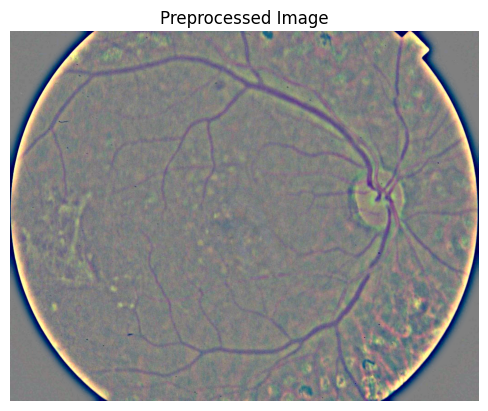

In [22]:
# Load an image (replace 'path/to/image.jpg' with the actual path)
image = cv2.imread('/kaggle/input/resized-2015-2019-blindness-detection-images/resized train 19/001639a390f0.jpg')

# Apply preprocessing
processed_image = preprocess_image(image)

# Display the processed image
import matplotlib.pyplot as plt
plt.imshow(processed_image)
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()